In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ours
from solver.funcs import randomData, accuracy, plot2D
from solver.NSSVM import NSSVM

In [2]:
# data
dim = 0
Ex  = ('2D', '3D', 'nD')
m0  = int(4e2)
n0  = 100

# data
X, y, tX, ty = randomData(Ex[dim], m0, n0, 0)
[m, n] = X.shape

# svm
pars = {'C': 0.25, 
        's0': int(np.ceil(n * (np.log(m/n)) ** 2))}


In [3]:
# training
model = NSSVM()
out = model.fit(X, y, pars)

    1          1.07e-01         0.53500
    2          1.01e+01         0.95500
    3          2.05e+00         0.95500
    4          4.18e-01         0.95500
    5          1.57e-02         0.95500
    6          1.14e-02         0.95500
    7          5.45e+00         0.95500
    8          5.87e-01         0.95500
    9          2.68e-02         0.95500
   10          5.12e+00         0.96000
   11          7.87e-01         0.95500
   12          5.26e-03         0.96000
   13          5.05e-31         0.96000


In [4]:
# evaluation
acc, _ = accuracy(X, out['w'], y)
tacc, _ = accuracy(tX, out['w'], ty)

In [5]:
# logging
print(f"Training  Time:             {out['time']:.3f}sec")
print(f"Training  Size:             {m}x{n}")
print(f"Training  Accuracy:         {acc*100:.2f}%")
print(f"Testing   Size:             {tX.shape[0]}x{n}")
print(f"Testing   Accuracy:         {tacc*100:.2f}%")
print(f"Number of Support Vectors:  {out['sv']}")

Training  Time:             0.036sec
Training  Size:             200x2
Training  Accuracy:         96.00%
Testing   Size:             200x2
Testing   Accuracy:         98.50%
Number of Support Vectors:  43


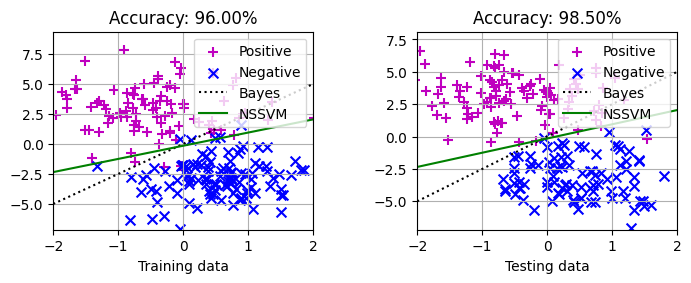

In [6]:
# plotting
if Ex[dim] == '2D' and m < 400:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    fig.subplots_adjust(left=0.12, bottom=0.14, right=0.9, top=0.8, wspace=0.4)

    plot2D(X, y, out['w'], 'NSSVM', acc, ax=axes[0])
    axes[0].set_xlabel('Training data')

    plot2D(tX, ty, out['w'], 'NSSVM', tacc, ax=axes[1])
    axes[1].set_xlabel('Testing data')

    plt.show()